<a href="https://colab.research.google.com/github/suprnrdy/tml-assignment-2/blob/master/fastai_v3_lesson2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

## Assignment Details
https://github.com/suprnrdy/tml-assignment-2<br/>
https://github.com/ayasin/tml-assignment-2

---



In this assignment you will be required to
* Create a dataset consisting of at least 4 classes
* Train a classifier to at least 80% accuracy
* Deploy your classifier to [Heroku](https://heroku.com).  Instructions on setting up an account and deploying can be found there.  **YOU DO NOT NEED A PAID ACCOUNT FOR THIS, THE FREE ACCOUNT IS FINE**
    * Your app should report the classes you support at `/api/class_list`.  This should be a `GET` endpoint.
    * Your app should accept a URL in a post request with an image and respond with a classification at `/api/classify`

Your classifier must be a "fine grained" classifier.  Think cat breeds, not cat vs elephant.

In addition to the classification, you will need to submit answers to 3 questions (these answers should be added to the app.py in the appropriate spot...see below):
* How can you detect overfitting or underfitting?
* Describe how gradient decent works.
* What is the goal of regression?


In [0]:
# Scaffolding: Get the latest fast.ai libraries, set library auto reload on, draw plots inline
!curl -s https://course.fast.ai/setup/colab  | bash
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Set up google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_drive = "/content/gdrive/My Drive/"
base_drive = root_drive + 'fastai-v3/lesson2/'

Updating fastai...
Done.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
folder = ['nikehuarache', 'nikeairmax', 'nikeairforce1', 'nikecortez']
file = ['nikehuarache.csv', 'nikeairmax.csv', 'nikeairforce1.csv', 'nikecortez.csv']

In [0]:
path = Path(base_drive + 'data/shoes')
#loop through this for all folders
for c in folder:
  dest = path/c
  dest.mkdir(parents=True, exist_ok=True)
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/nikeairmax.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/nikehuarache.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/models'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/export.pkl'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/nikecortez.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/nikeairforce1.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/nikehuarache'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/nikeairmax'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/nikeairforce1'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/lesson2/data/shoes/nikecortez')]

# Download Images


In [0]:
# Loop through each list and download files, putting them in their appropriate folder
for i in range(len(folder)):
  download_images(path/file[i], path/folder[i], max_pics=200)

In [0]:
# Remove any images that can't be opened
for c in folder:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

# View the Data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['nikeairforce1', 'nikeairmax', 'nikecortez', 'nikehuarache']

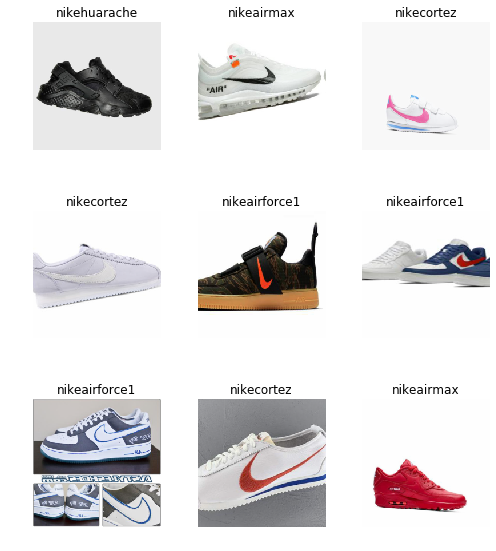

In [0]:
data.show_batch(rows=3,figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['nikeairforce1', 'nikeairmax', 'nikecortez', 'nikehuarache'], 4, 580, 145)

# Train Model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.674693,0.952590,0.422535,00:13
1,1.155171,0.513557,0.204225,00:12
2,0.873330,0.472892,0.183099,00:12
3,0.738989,0.475051,0.169014,00:12


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


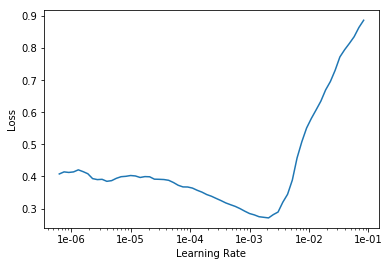

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-1')

In [0]:
learn.fit_one_cycle(3,max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.382275,0.450809,0.154930,00:13
1,0.332283,0.409279,0.140845,00:13
2,0.305797,0.398465,0.133803,00:13


In [0]:
learn.save('stage-2')

# Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (580 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
nikehuarache,nikehuarache,nikehuarache,nikehuarache,nikehuarache
Path: /content/gdrive/My Drive/fastai-v3/lesson2/data/shoes;

Valid: LabelList (145 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
nikeairmax,nikeairforce1,nikecortez,nikehuarache,nikeairforce1
Path: /content/gdrive/My Drive/fastai-v3/lesson2/data/shoes;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64,

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

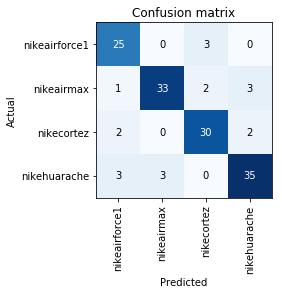

In [0]:
interp.plot_confusion_matrix()

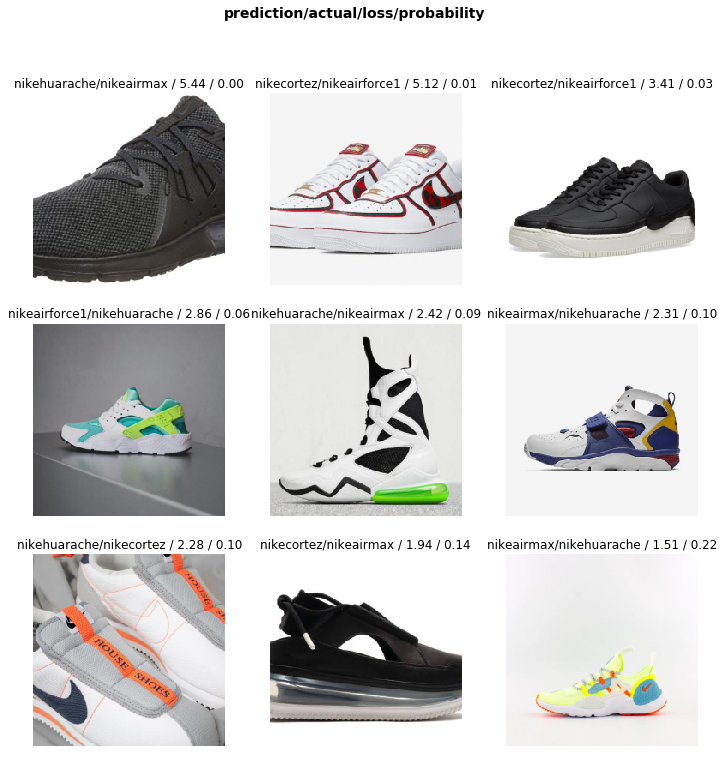

In [0]:
interp.plot_top_losses(9)

In [0]:
learn.export()